In [1]:
from get_data import *
import tensorflow as tf
import numpy
import random
import time
import matplotlib.pyplot as plt

In [2]:
t=getdata()
test=gettestdata()

In [3]:
learning_rate = 0.001
epochs = 200
minibatch_size = 100
costs = []

Train_Accuracy=[]
Test_Accuracy=[]
Test_cost=[]
Train_cost=[]
General_cost=[]

In [4]:
t=t[1:len(t)]
test=test[1:len(test)]

In [5]:
length=len(t)
print(length)
print(len(test))

2000
400


In [6]:
random.shuffle(t)
feature=np.zeros((length,14,4))
y_true=np.zeros((length,1))
X_test = []

In [7]:
for i in range(length):
    feature[i] = t[i]['features'].reshape(14,4)
    y_true[i] = t[i]['label']
    
for i in range(len(test)):
    X_test.append(test[i]['features'].reshape(14,4))
X_test = np.array(X_test)

In [8]:
r = np.random.permutation(length)
feature = feature[r,:,:]
y_true = y_true[r,:]


print(feature.shape)
print(y_true.shape)
print(type(feature))
print(type(y_true))
print("the test is ",X_test.shape,type(X_test))
dev_set_size = 200

dev_set = feature[length - dev_set_size:length,:,:]
dev_set_y = y_true[length - dev_set_size:length,:]

print("the shape of develop set is " + str(dev_set.shape))
print(dev_set_y.shape)

feature=feature#[0:length - dev_set_size]
y_true=y_true#[0:length - dev_set_size]

print("the shape of training set is " + str(feature.shape))
print(y_true.shape)

_Setsize,_DNA_length,_channel_number = feature.shape
_Setsize,_labels = y_true.shape

(2000, 14, 4)
(2000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
the test is  (400, 14, 4) <class 'numpy.ndarray'>
the shape of develop set is (200, 14, 4)
(200, 1)
the shape of training set is (2000, 14, 4)
(2000, 1)


In [9]:
X = tf.placeholder(tf.float32,shape=[None,_DNA_length,_channel_number],name='trainingset')
Y = tf.placeholder(tf.float32,shape=[None,_labels],name='labels')


In [10]:

W1 = tf.get_variable("W1", [1, 4, 4], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
W2 = tf.get_variable("W2", [3, 4, 8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
W3 = tf.get_variable("W3", [5, 8, 16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
W4 = tf.get_variable("W4", [8, 16, 32], initializer = tf.contrib.layers.xavier_initializer(seed = 0))



In [11]:
Z1 = tf.nn.conv1d(X, W1, 1,padding='SAME')
print('Z1 is ',Z1)
A1 = tf.nn.relu(Z1)
#P1 = tf.layers.max_pooling1d(A1,2,2)
#print('P1 is ',P1)
Z2 = tf.nn.conv1d(A1, W2, 1,padding='VALID')
print('Z2 is ',Z2)
A2 = tf.nn.relu(Z2)
#P2 = tf.layers.max_pooling1d(A2,7,1)
Z3 = tf.nn.conv1d(A2, W3, 1,padding='VALID')
A3 = tf.nn.relu(Z3)
print('A3 is ',A3)

Z4 = tf.nn.conv1d(A3, W4, 1,padding='VALID')
A4 = tf.nn.relu(Z4)
print('A4 is ',A4)


A4 = tf.contrib.layers.flatten(A4)
print('A4 is ',A4)
output = tf.contrib.layers.fully_connected(A4, num_outputs=1, activation_fn=None)
print('A4_fc is ',output)
print('Y is ',Y)
#cost =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Z2_fc,labels = Y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels= Y,logits=output))


Z1 is  Tensor("conv1d/Squeeze:0", shape=(?, 14, 4), dtype=float32)
Z2 is  Tensor("conv1d_1/Squeeze:0", shape=(?, 12, 8), dtype=float32)
A3 is  Tensor("Relu_2:0", shape=(?, 8, 16), dtype=float32)
A4 is  Tensor("Relu_3:0", shape=(?, 1, 32), dtype=float32)
A4 is  Tensor("Flatten/flatten/Reshape:0", shape=(?, 32), dtype=float32)
A4_fc is  Tensor("fully_connected/BiasAdd:0", shape=(?, 1), dtype=float32)
Y is  Tensor("labels:0", shape=(?, 1), dtype=float32)


In [12]:
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Cost after epoch 0: 0.346035
Cost after epoch 10: 0.209481
Cost after epoch 20: 0.177060
Cost after epoch 30: 0.166135
Cost after epoch 40: 0.160218
Cost after epoch 50: 0.156826
Cost after epoch 60: 0.154731
Cost after epoch 70: 0.153043
Cost after epoch 80: 0.151706
Cost after epoch 90: 0.150426
Cost after epoch 100: 0.149294
Cost after epoch 110: 0.148156
Cost after epoch 120: 0.147037
Cost after epoch 130: 0.145979
Cost after epoch 140: 0.144847
Cost after epoch 150: 0.143754
Cost after epoch 160: 0.142747
Cost after epoch 170: 0.141742
Cost after epoch 180: 0.140685
Cost after epoch 190: 0.139489


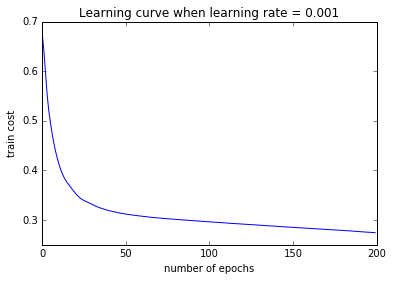

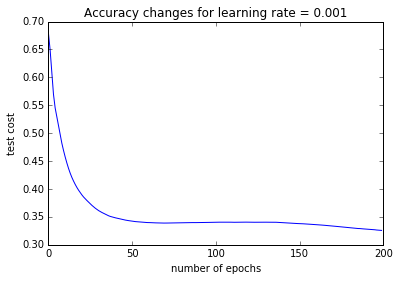

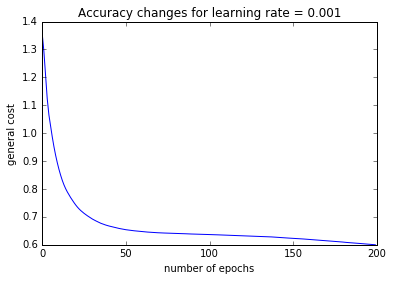

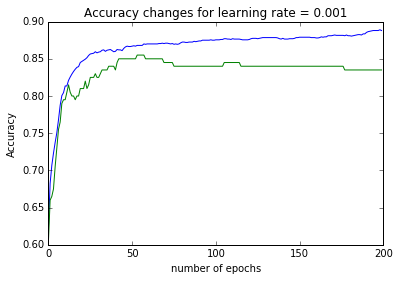

Tensor("fully_connected/BiasAdd:0", shape=(?, 1), dtype=float32)
Tensor("GreaterEqual_200:0", shape=(?, 1), dtype=bool)
Tensor("Mean_201:0", shape=(), dtype=float32)
Train Accuracy: 0.888
Test Accuracy: 0.835


In [13]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    seed = 0
    for epoch in range(epochs):
        minibatch_cost = 0.
        num_minibatches = int(_Setsize/minibatch_size)
        seed = seed + 1
        minibatches = random_mini_batches(feature, y_true, mini_batch_size = 200, seed = seed)
        
        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            _ , temp_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
            minibatch_cost += temp_cost / num_minibatches
        if epoch % 1 == 0:
            costs.append(minibatch_cost)
            
            prediction_tmp = tf.sigmoid(output)
            prediction_tmp = (prediction_tmp>=0.5)
            prediction_tmp = tf.cast(prediction_tmp,"float")
            correct_prediction = tf.equal(prediction_tmp, Y)
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            train_accuracy = accuracy.eval({X: feature, Y: y_true})
            test_accuracy = accuracy.eval({X: dev_set, Y: dev_set_y})
            test_cost = sess.run(cost,feed_dict={X:dev_set,Y:dev_set_y})
            Test_cost.append(test_cost)
            train_cost = sess.run(cost,feed_dict={X:feature,Y:y_true})
            Train_cost.append(train_cost)
            General_cost.append(test_cost + train_cost)
            Train_Accuracy.append(train_accuracy)
            Test_Accuracy.append(test_accuracy)
            
        if epoch % 10 == 0:
            print("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            
            #prediction_tmp=tf.sigmoid(output)
            #prediction_tmp = (prediction_tmp>=0.5)
            #prediction_tmp = tf.cast(prediction_tmp,"float")
            #correct_prediction = tf.equal(prediction_tmp, Y)
            #accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            #train_accuracy = accuracy.eval({X: feature, Y: y_true})
            #test_accuracy = accuracy.eval({X: dev_set, Y: dev_set_y})
            #test_cost = sess.run(cost,feed_dict={X:dev_set,Y:dev_set_y})
            #Test_cost.append(test_cost)
            #Train_Accuracy.append(train_accuracy)
            #Test_Accuracy.append(test_accuracy)
            
            
            
    plt.plot(np.squeeze(Train_cost))
    plt.ylabel('train cost')
    plt.xlabel('number of epochs')
    plt.title("Learning curve when learning rate = "+str(learning_rate))
    plt.show()
    ## 下面是作圖專用
    plt.plot(np.squeeze(Test_cost))
    plt.ylabel('test cost')
    plt.xlabel('number of epochs')
    plt.title("Accuracy changes for learning rate = "+str(learning_rate))
    plt.show()
    ##
    plt.plot(np.squeeze(General_cost))
    plt.ylabel('general cost')
    plt.xlabel('number of epochs')
    plt.title("Accuracy changes for learning rate = "+str(learning_rate))
    plt.show()
    ##
    plt.plot(np.squeeze(Train_Accuracy))
    plt.plot(np.squeeze(Test_Accuracy))
    plt.ylabel('Accuracy')
    plt.xlabel('number of epochs')
    plt.title("Accuracy changes for learning rate = "+str(learning_rate))
    plt.show()
    ##
    print(output)
    predict_op = tf.sigmoid(output)
    predict_op = (predict_op>=0.5)
    print(predict_op)
    predict_op = tf.cast(predict_op,"float")
    correct_prediction = tf.equal(predict_op,Y)
    correct_prediction = tf.cast(correct_prediction,"float")
    accuracy = tf.reduce_mean(correct_prediction)
    print(accuracy)
    train_accuracy = accuracy.eval({X: feature, Y: y_true})
    test_accuracy = accuracy.eval({X: dev_set, Y: dev_set_y})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy) 
    a=sess.run(tf.sigmoid(output),feed_dict={X:feature})
    predict_feature = np.array((a >= 0.5),dtype="int")
    
    
    y=sess.run(tf.sigmoid(output),feed_dict={X:X_test})
    predict_test = np.array((y >= 0.5),dtype="int")
    #print(predict_test)
    

In [14]:
print(len(a))
print(len(predict_feature))

2000
2000


In [16]:
csvfile = open('prediction.csv','a',newline='')
output = csv.writer(csvfile)
output.writerow(['id','prediction'])
for i in range(len(predict_test)):
    tmp=[i,int(predict_test[i])]
    output.writerow(tmp)

In [16]:
print(y_true[0:200])

[[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.

In [17]:
print(X_test[0])

[[0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]]
